In [ ]:
#!pip install numpy pandas matplotlib seaborn sklearn lightgbm xgboost catboost

In [ ]:
#Importation des packages nécessaires à l'analyse. J'aime généralement importer les packages dans l'ordre alphabétique, 
#afin qu'il soit facile de les consulter si nécessaire

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error, r2_score,mean_absolute_percentage_error

In [2]:
!pip install lightgbm

  Using cached lightgbm-3.3.3-py3-none-win_amd64.whl (1.0 MB)


In [22]:
!pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [24]:
!pip install catboost

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [3]:
#Importation des données et exploration
data = pd.read_csv("bmw_prep.csv")
data.head()

,year,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,selling_price
0,2015,1 Series,10388,Manual,28640,Diesel,0,83.1,1.5,4794.0620
1,2017,1 Series,22991,Semi-Auto,15709,Petrol,145,39.8,3.0,13532.5026
2,2019,1 Series,31790,Semi-Auto,8211,Petrol,145,34.5,2.0,24328.8870
3,2017,1 Series,19490,Manual,10,Petrol,125,53.3,1.5,11471.8140
4,2015,1 Series,9600,Manual,30755,Diesel,0,83.1,1.5,4430.4000


In [ ]:
#Analyse statistique préliminaire :

In [69]:
# Check for missing values
#Voir s'il y a des valeurs manquantes dans les enregistrements
data.isnull().sum()
#Nice :) c'est une donnée agréable et propre, très bonne avec laquelle travailler !

year             0
model            0
price            0
transmission     0
mileage          0
fuelType         0
tax              0
mpg              0
engineSize       0
selling_price    0
dtype: int64

In [70]:
# check for the datatypes amd other info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10781 non-null  int64  
 1   model          10781 non-null  object 
 2   price          10781 non-null  int64  
 3   transmission   10781 non-null  object 
 4   mileage        10781 non-null  int64  
 5   fuelType       10781 non-null  object 
 6   tax            10781 non-null  int64  
 7   mpg            10781 non-null  float64
 8   engineSize     10781 non-null  float64
 9   selling_price  10781 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 842.4+ KB


In [63]:
#Basic EDA
# Check the shape of data
data.shape

(10781, 10)

In [71]:
# check the statistics of data
print(data.describe())

               year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  selling_price  
count  10781.000000   10781.000000  
mean       2.167767   15289.092299  
std        0.552054   10162.129757  
min        0.000000     216.000000  
25%        2.000000    7673.400000  
50%        2.000000   12649.014000  
75%        

In [64]:
# Check column names of the data
data.columns

Index(['year', 'model', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'selling_price'],
      dtype='object')

In [4]:
data['fuelType'].value_counts()

Diesel      7027
Petrol      3417
Hybrid       334
Electric       3
Name: fuelType, dtype: int64

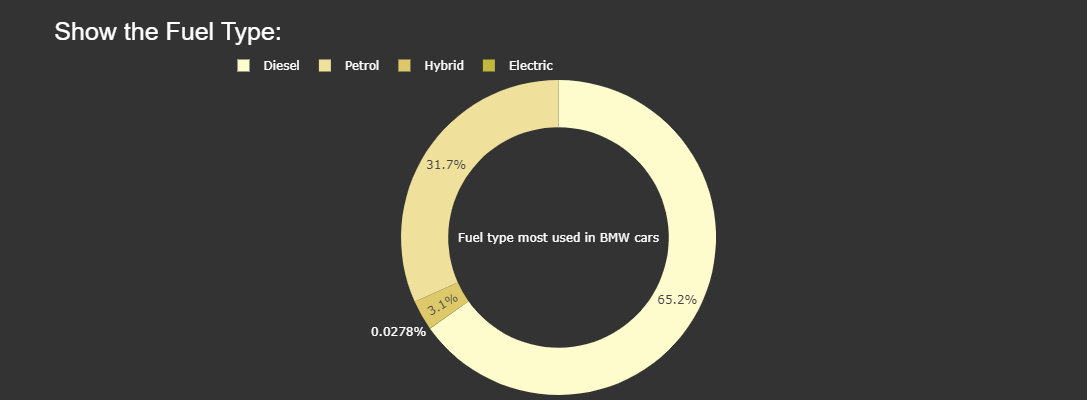

In [38]:
fuel=pd.DataFrame(data["fuelType"].value_counts().reset_index().rename(columns={"index":"Fuel_type","fuelType":"Total"}))

fig=go.Figure(data=[go.Pie(labels=fuel["Fuel_type"],
                          values=fuel["Total"],
                          hole=.7,
                          title="Fuel type most used in BMW cars",
                          marker_colors=px.colors.sequential.speed,)])
fig.update_layout(title="Show the Fuel Type:")

fig.update_xaxes(showgrid=False)

fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",
                  xaxis_title=' ', yaxis_title=" ", height=400,plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='white', family="Lato, sans-serif"),
 font=dict(color='white'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="right", x=0.5),
                  hoverlabel=dict(bgcolor="green", font_size=13, font_family="Lato, sans-serif"))
                 


fig.show()

<AxesSubplot:xlabel='fuelType', ylabel='price'>

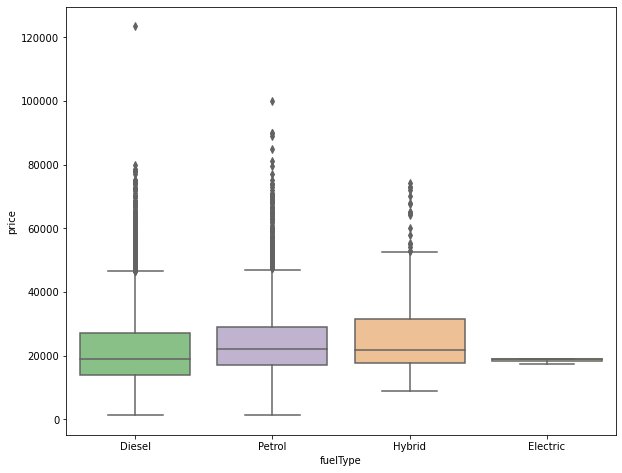

In [57]:
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(20)))
sns.boxplot(x = 'fuelType', y = 'price', data = data,palette='Accent')

In [66]:
#Vérifions quelle transmission est la plus populaire
data['transmission'].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='transmission', ylabel='count'>

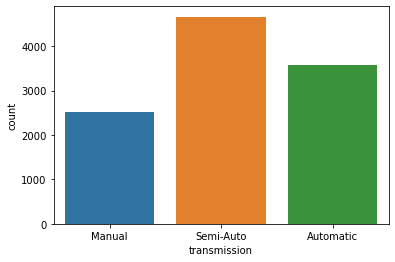

In [39]:
#Most of the cars on the dataset are with semi-automatic transmission, then cars in automatic and the least manual transmission
sns.countplot(data["transmission"])

In [44]:
#Matplotlib/PyPlot don't currently support metric sizes, though, 
#it's easy to write a helper function to convert between the two:
def cm_to_inch(value):
    return value/2.54

 3 Series    0.226602
 1 Series    0.182636
 2 Series    0.113997
 5 Series    0.097950
 4 Series    0.092292
 X1          0.074576
 X3          0.051108
 X5          0.043410
 X2          0.026714
 X4          0.016603
 M4          0.011594
 Z4          0.010018
 6 Series    0.010018
 7 Series    0.009832
 X6          0.009832
 X7          0.005102
 i3          0.003988
 8 Series    0.003617
 M5          0.002690
 M3          0.002504
 M2          0.001948
 i8          0.001577
 M6          0.000742
 Z3          0.000649
Name: model, dtype: float64


<AxesSubplot:xlabel='count', ylabel='model'>

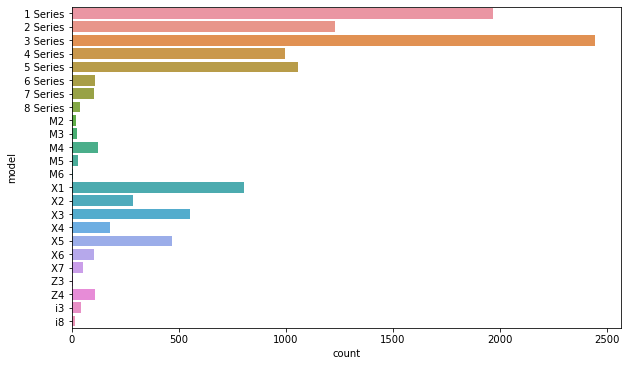

In [46]:
print(data["model"].value_counts() / len(data))
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(15)))
sns.countplot(y = data["model"])
#Top 3 cars are 3 Series, 1 Series and 2 Series on the dataset constuite 52% of all the BMW cars, with all other cars contributing to 48%

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



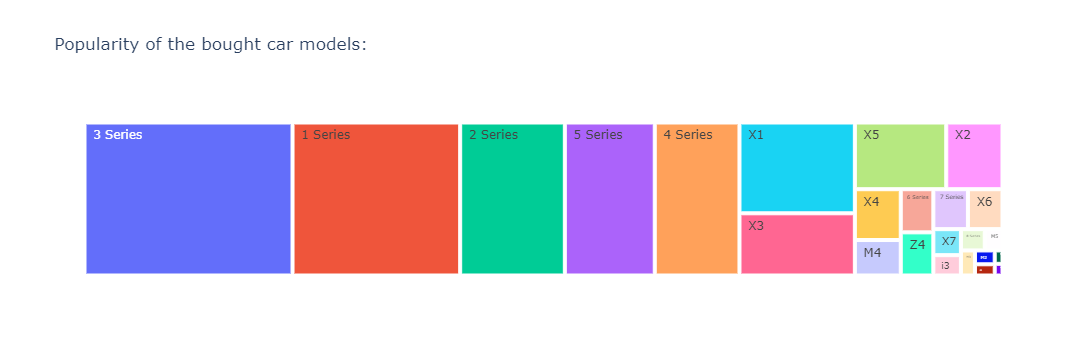

In [74]:
model_count=data
ax2= px.treemap(model_count,path=["model"],title="Popularity of the bought car models:")
ax2.show()

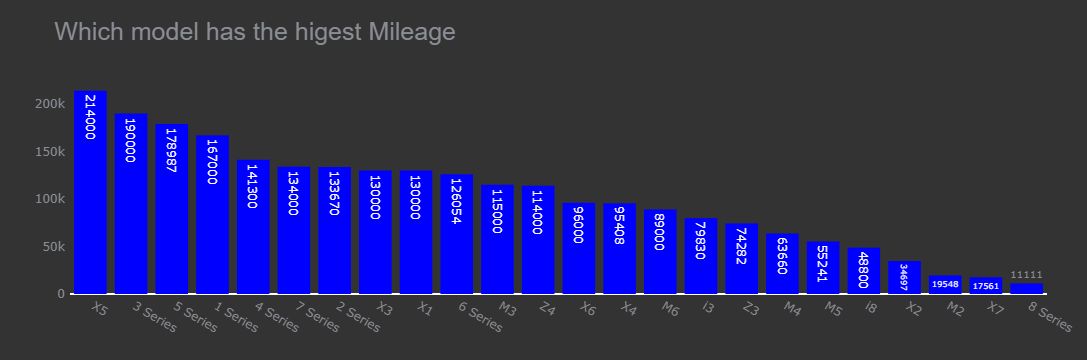

In [65]:
mileage=data.groupby(["model"])["mileage"].max().sort_values(ascending=False).reset_index()

fig=px.bar(mileage,x="model",y="mileage",title="Which model has the higest Mileage",text="mileage",color_discrete_sequence=["blue"])
fig.update_xaxes(showgrid=False)

fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",
                  xaxis_title=' ', yaxis_title=" ", height=350,plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
 font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="right", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
                 
                  

fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='mileage', ylabel='price'>

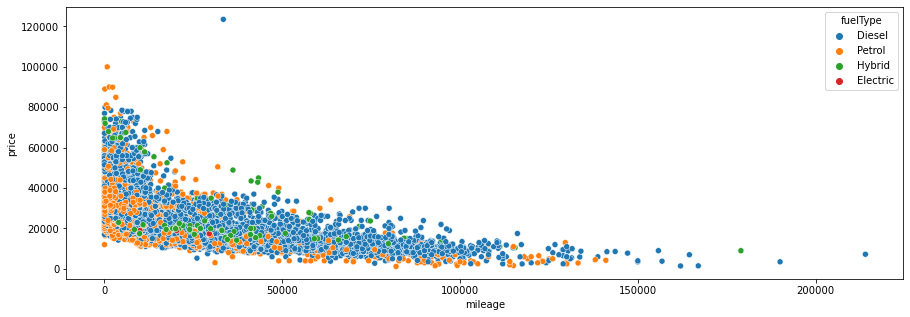

In [68]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(data["mileage"], data["price"], hue = data["fuelType"])

<AxesSubplot:xlabel='year', ylabel='count'>

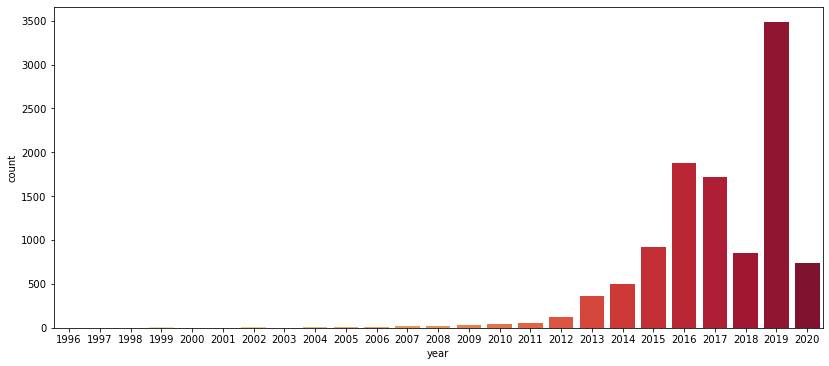

In [48]:
#Vérification de l'année à partir de laquelle les voitures sont les plus populaires :
plt.figure(figsize=(cm_to_inch(35),cm_to_inch(15)))
sns.countplot(data=data, x = data["year"], palette='YlOrRd')
# We can see that 3,500 cars were registered in 2019

In [ ]:
#Comme nous pouvons le voir au Royaume-Uni, l'année automobile la plus populaire est 2019.
#Les gens préfèrent acheter des voitures des 4 dernières années plutôt qu'un véhicule neuf

<AxesSubplot:xlabel='model', ylabel='price'>

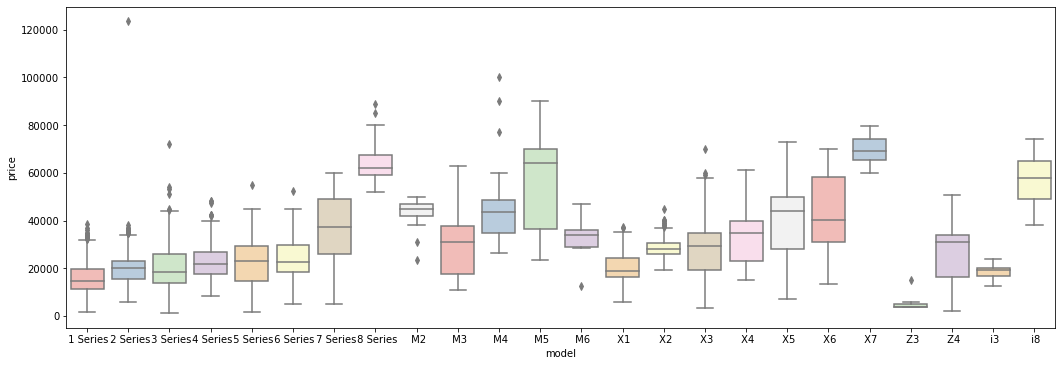

In [51]:
plt.figure(figsize=(cm_to_inch(45),cm_to_inch(15)))
sns.boxplot(x = 'model', y = 'price', data = data,palette='Pastel1')

In [ ]:
#Selon les graphiques ci-dessus, il existe des valeurs aberrantes dans l'ensemble de données qui peuvent affecter les performances du modèle

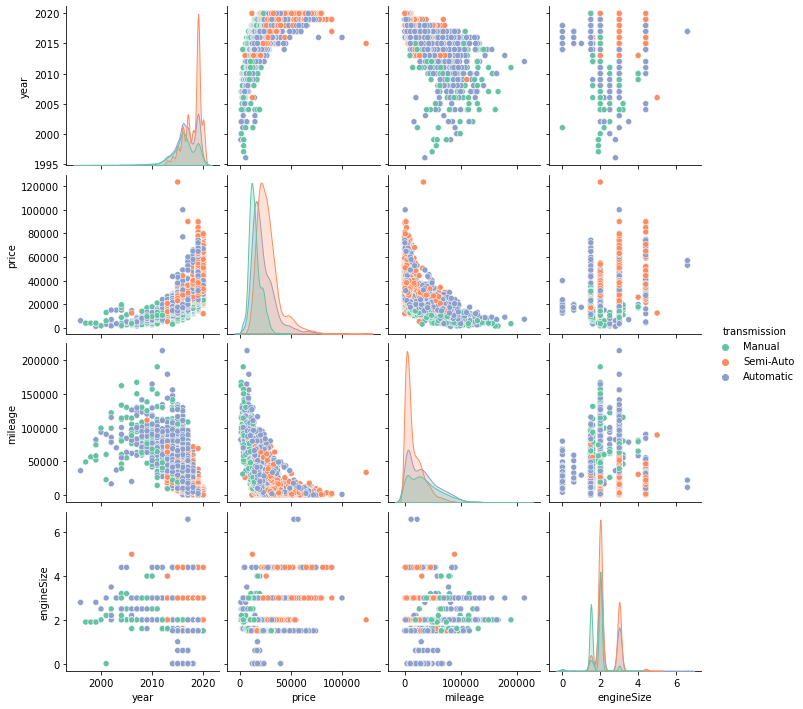

In [73]:
plot = sns.pairplot(data.drop(["tax", "mpg", "selling_price"], axis= 1), hue= "transmission", palette = sns.color_palette("Set2", 3))
#sns.boxplot(x = 'engineSize', y = 'price', data = data,palette='Accent')

In [70]:
# lets see the Correlation between the features
print(data.corr())

                   year     price   mileage       tax       mpg  engineSize  \
year           1.000000  0.623756 -0.774382  0.025200 -0.071762   -0.026337   
price          0.623756  1.000000 -0.605397  0.263484 -0.204882    0.460196   
mileage       -0.774382 -0.605397  1.000000 -0.170747  0.118609   -0.002540   
tax            0.025200  0.263484 -0.170747  1.000000 -0.351798    0.429616   
mpg           -0.071762 -0.204882  0.118609 -0.351798  1.000000   -0.399844   
engineSize    -0.026337  0.460196 -0.002540  0.429616 -0.399844    1.000000   
selling_price  0.715037  0.976227 -0.661548  0.221773 -0.204086    0.356246   

               selling_price  
year                0.715037  
price               0.976227  
mileage            -0.661548  
tax                 0.221773  
mpg                -0.204086  
engineSize          0.356246  
selling_price       1.000000  


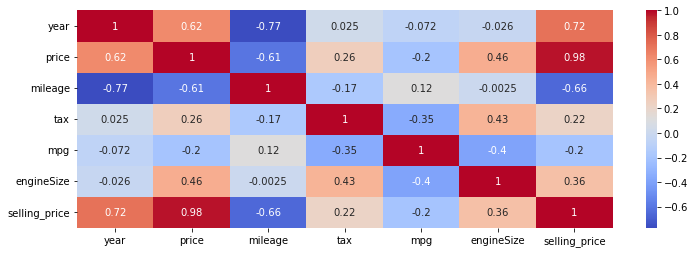

In [71]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [72]:
#Basic Preprocessing
# Lets encode the text features using Label Encoding
le = LabelEncoder()
data['fuelType'] = le.fit_transform(data.fuelType.values)

data['transmission'] = le.fit_transform(data.transmission.values)
data.head()

,year,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,selling_price
0,2015,1 Series,10388,1,28640,0,0,83.1,1.5,4794.0620
1,2017,1 Series,22991,2,15709,3,145,39.8,3.0,13532.5026
2,2019,1 Series,31790,2,8211,3,145,34.5,2.0,24328.8870
3,2017,1 Series,19490,1,10,3,125,53.3,1.5,11471.8140
4,2015,1 Series,9600,1,30755,0,0,83.1,1.5,4430.4000


In [61]:
#Petrol=3, Hybrid=2, Electric=1, Diesel=0
data['fuelType'].values
data.fuelType.unique()

array([0, 3, 2, 1])

In [73]:
#Automatic=0, Manual=1, Semi-Auto=2
data.transmission.unique()

array([1, 2, 0])

In [74]:
# Target column is Selling Price
predict = "selling_price"
data = data[["year", "mileage", 
             "price", "fuelType", "transmission", 
             "engineSize", "selling_price"]]

In [75]:
# Split dataset into input (other than selling price) and output (Selling Price)
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_4032\757806913.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [76]:
# Now split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
#Model Building

In [77]:
# Train all 7 models on x_train and y_train
lrmodel=LinearRegression().fit(x_train,y_train)
dt_model = DecisionTreeRegressor().fit(x_train,y_train)
rf_model=RandomForestRegressor().fit(x_train,y_train)
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)
lgbm_model=LGBMRegressor().fit(x_train,y_train)
xgb_model= XGBRegressor().fit(x_train,y_train)
catb_model= CatBoostRegressor().fit(x_train,y_train)

Learning rate set to 0.057547
0:	learn: 9592.5891087	total: 2.89ms	remaining: 2.89s
1:	learn: 9091.9423006	total: 5.13ms	remaining: 2.56s
2:	learn: 8624.4911275	total: 7.21ms	remaining: 2.39s
3:	learn: 8172.6169382	total: 9.35ms	remaining: 2.33s
4:	learn: 7752.2281927	total: 11.5ms	remaining: 2.29s
5:	learn: 7360.4450301	total: 13.6ms	remaining: 2.25s
6:	learn: 6982.3110016	total: 15.7ms	remaining: 2.22s
7:	learn: 6615.5951658	total: 17.9ms	remaining: 2.22s
8:	learn: 6289.4145724	total: 20ms	remaining: 2.2s
9:	learn: 5983.6235489	total: 22ms	remaining: 2.18s
10:	learn: 5680.9588651	total: 24.1ms	remaining: 2.17s
11:	learn: 5405.7636632	total: 26.1ms	remaining: 2.15s
12:	learn: 5132.7966513	total: 28.5ms	remaining: 2.16s
13:	learn: 4874.3930059	total: 30.8ms	remaining: 2.17s
14:	learn: 4631.6617578	total: 32.9ms	remaining: 2.16s
15:	learn: 4398.7720628	total: 35.2ms	remaining: 2.16s
16:	learn: 4186.3520698	total: 37.4ms	remaining: 2.16s
17:	learn: 3982.2632790	total: 39.4ms	remaining: 2

In [27]:
#Evaluating Models

In [78]:
# define function to evaluate all these 7 models
def evaluate_model(model,x_test,y_test):
    prediction=model.predict(x_test)
    print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
    print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squared Error:",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))

In [79]:
# Lets evaluate these 7 models and see the results
print("LR_Model:")
print(evaluate_model(lrmodel,x_test,y_test))
print()
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test))
print()
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test))
print()
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test))
print()
print("LGBM_Model:")
print(evaluate_model(lgbm_model,x_test,y_test))
print()
print("XGB_Model:")
print(evaluate_model(xgb_model,x_test,y_test))
print()
print("CatBoost_Model:")
print(evaluate_model(catb_model,x_test,y_test))

LR_Model:
Mean Absolute Error: 1033.5600166932375
Mean Absolute Percentage Error: 0.22618683530376416
Mean Squared Error: 2689328.502607846
Root Mean Squared Error: 1639.9172243158635
R2 Score: 0.9748827595900104
None

DT_Model:
Mean Absolute Error: 39.49757190542444
Mean Absolute Percentage Error: 0.00304833315919824
Mean Squared Error: 185114.50130311953
Root Mean Squared Error: 430.2493478241652
R2 Score: 0.9982711054346477
None

RF_Model:
Mean Absolute Error: 36.06064773064614
Mean Absolute Percentage Error: 0.0024409648191995753
Mean Squared Error: 111097.12179525678
Root Mean Squared Error: 333.31234869901954
R2 Score: 0.9989623978200196
None

GBM_Model:
Mean Absolute Error: 191.22063451618115
Mean Absolute Percentage Error: 0.01785937359478552
Mean Squared Error: 107934.53204981169
Root Mean Squared Error: 328.53391308936693
R2 Score: 0.9989919351290086
None

LGBM_Model:
Mean Absolute Error: 109.76721305811046
Mean Absolute Percentage Error: 0.009615609957063419
Mean Squared Err

In [80]:
# Predictions
# From above result, as r2 is comparitely high in XGB_Model and CatBoost Model,
# so we will finalize this model, also now Lets do the prediction for x_test data
predictions = catb_model.predict(x_test)
predictions

array([ 8746.19131546,  8917.75782145, 27978.0280618 , ...,
        9442.30232346, 10832.08462351,  6167.0697183 ])

In [84]:
# Let's do the prediction new unknown data 
# ["year", "mileage", "price", "fuelType", "transmission", "engineSize", "selling_price"]
input=[[2018,30000,35000,3,1,3.0,0]]
price = catb_model.predict(input)
print(price.round(1)[0],"in £")

24066.2 in £


In [85]:
# Save the model in pickle file
import pickle
pickle.dump(catb_model,open("car_price_predictor_model.pkl","wb"))